# 데이터 분석

타이타닉 데이터셋
- 1912년 타이타닉호에 탑승했던 탑승객 중 일부 데이터 (생존여부 포함)를 학습
- 생존에 기여한 데이터 특성을 발견
- 테스트 데이터에 대하여 90% 이상의 정확도로 생존률을 예측하는 머신러닝 모델 개발


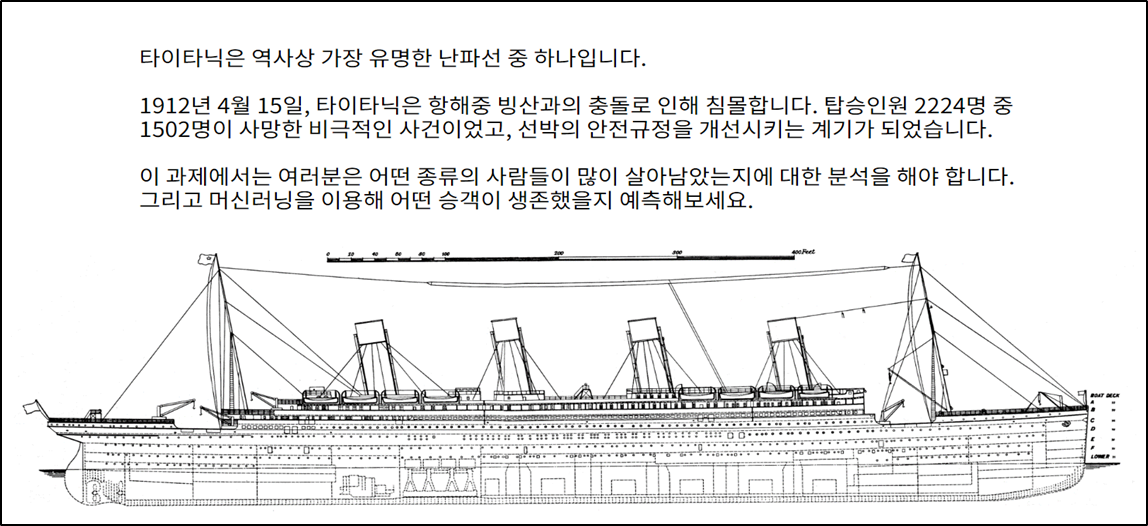

설명 및 데이터 출처:  https://dacon.io/competitions/open/235539/overview/description


### 라이브러리 import

In [1]:
from google.colab import drive

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#타이타닉 데이터셋 로드
import seaborn as sns

from sklearn import preprocessing

**타이타닉 데이터 분석 준비사항**
- Colab과 Google Drive 활용
- Google drive의 홈에 /SeSAC 과 /SeSAC/Data - 디렉토리를 생성한다.
- 아래 github에서 test.csv와 train.csv를 다운받아 /SeSAC/Data/titanic에 업로드 한다.
  https://github.com/Harksu71/DataScienceAnalytics/tree/main/data/titanic


## 데이터 준비

### 데이터 로드 및 데이터 프레임화

In [ ]:
# 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')
#설정한 디렉토리에 따라 "/SeSAC/Data/" 파트를 조정한다.
#애매하면 "/content/drive/My Drive/" 루트에 저장한다.
colab_path = "/content/drive/My Drive/SeSAC/Data/"

ValueError: mount failed

In [ ]:
# 데이터 파일 로드 (데이타는 /SeSAC/Data/titanic/ 디렉토리에 파일을 업로드 한다)
df_train = pd.read_csv(colab_path + 'titanic/titanic_train.csv')
df_test = pd.read_csv(colab_path + 'titanic/titanic_test.csv')
print("학습데이터: {}건, 테스트용 데이터: {}건".format(len(df_train), len(df_test)))

### 데이터 구조 확인

In [ ]:
# 데이터 샘플 확인
df_train.head()

In [ ]:
# 데이터 dimension 확인
df_train.shape

(891, 12)

In [ ]:
# 데이터의 개략적인 정보 확인
# df_train.columns
# df_train.dtypes
# df_train.info()
# df_train.describe()

### Feature (파생변수, 독립변수)와 Label (Target, 목적변수, 종속변수) 확인

타이타닉 학습용 데이터 (이하 df_train) 에서 최종적으로 예측해야 할 변수는 ‘Survived’ 필드이다.  본 과정에서는 이를 Label이라 지칭하며 Target, 목적변수, 종속변수라도 한다. ‘Survived’를 제외한 나머지 필드는 ML 모델에 사용될 Feature로 활용한다 (파생변수, 독립변수라고도 한다).


‘Survived’의 구성요소 값  0, 1에 대해서는 데이터 description을 참고하여 의미를 확실히 하도록 한다. (0: 사망, 1: 생존) https://www.kaggle.com/datasets/euclidsoft/titianic

In [ ]:
# 구성 값 확인
# df_train['Survived'].unique()

# value_counts()는 Series의 unique value를 count해주는 함수
# df_train['Survived'].value_counts()

# value_counts() 결과값을 percent 정보로 변환
(df_train['Survived'].value_counts()/len(df_train)*100).round(2)

Survived
0    61.62
1    38.38
Name: count, dtype: float64

각 Feature에 대하여 Part 3에서 살펴본 다양한 전처리 기법인 결측치, 이상치, 정규화, 인코딩 처리를 하여 학습데이터를 준비한다.

### 결측치 확인

In [ ]:
# 결측치 확인
#df_train.isnull().sum() #결측치의 개수
df_train.isnull().mean()*100 #결측치를 percentage로 확인

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

### 결측치 처리 - Embarked

In [ ]:
# 결측치 처리 - Embarked
# 가장 많이 나온 데이터로 대체
# value_counts는 unique값들의 count를 보여주는데, idxmax()로 그 중 가장 많이 나온 데이터를 반환
replace_value = df_train['Embarked'].value_counts(dropna=False).idxmax()
replace_value

'S'

In [ ]:
# 결측치 처리(대체) - Embarked
df_train['Embarked'] = df_train['Embarked'].fillna(replace_value)

### 결측치 처리 - Age

In [ ]:
# 결측치 처리 - Age
# 추후 Age가 결측치인 데이터를 필터링하여 추가분석 할 수 있도록 Column 생성
df_train['Age_isna'] = df_train['Age'].isna().astype(int)
df_train

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  Age_isna  
0        0         A/5 21171   7.2500   NaN        S         0  
1        0          PC 17599  71.2833   C85        C         0  
2        0  STON/O2. 3101282   7.9250   NaN        S         0  
3        0            113803  53.1000  C123        S         0  
4        0            373450   8.0500   NaN        S         0  
..     ...               ...      ...   ...      ...       ...  
886      0            211536  13.0000   NaN        S         0  
887      0            112053  30.0000   B42        S         0  
888      2        W./C. 6607  23.4500   NaN        S         1  
889      0            111369  30.0000  C148        C         0  
890      0            370376   7.7500   NaN        Q         0  

[891 rows x 13 columns]

In [ ]:
# 결측치 처리 - Age
# 평균값으로 대체 (mode, median 값 등을 사용할 수도 있음)
replace_value = df_train['Age'].mean().round(2)
replace_value

np.float64(29.7)

In [ ]:
# 결측치 처리(대체) - Age
df_train['Age'] = df_train['Age'].fillna(replace_value)

### 결측치 처리 - Cabin

결측치가 77.1%나 되는 ‘Cabin(객실번호)’ 필드의 경우, Cabin 값이 결측된 데이터를 모두 분석에서 제외시킬지, 대체하여 사용할지, 해당 필드를 Feature에서 제거할지 결정해야 한다.
‘Cabin’값을 대체할 만한 정보가 있을지 살펴보자


In [ ]:
# 결측치 처리 - Cabin
df_cabin_notnull = df_train.dropna(subset=['Cabin'])
for pclass in range(1,4):
    cabin_values = df_cabin_notnull[df_cabin_notnull['Pclass'] == pclass]['Cabin'].sort_values().values
    print ("Pclass {}에 해당하는 Cabin의 값: {}\n".format(pclass, cabin_values))

Pclass 1에 해당하는 Cabin의 값: ['A10' 'A14' 'A16' 'A19' 'A20' 'A23' 'A24' 'A26' 'A31' 'A32' 'A34' 'A36'
 'A5' 'A6' 'A7' 'B101' 'B102' 'B18' 'B18' 'B19' 'B20' 'B20' 'B22' 'B22'
 'B28' 'B28' 'B3' 'B30' 'B35' 'B35' 'B37' 'B38' 'B39' 'B4' 'B41' 'B42'
 'B49' 'B49' 'B5' 'B5' 'B50' 'B51 B53 B55' 'B51 B53 B55' 'B57 B59 B63 B66'
 'B57 B59 B63 B66' 'B58 B60' 'B58 B60' 'B69' 'B71' 'B73' 'B77' 'B77' 'B78'
 'B79' 'B80' 'B82 B84' 'B86' 'B94' 'B96 B98' 'B96 B98' 'B96 B98' 'B96 B98'
 'C101' 'C103' 'C104' 'C106' 'C110' 'C111' 'C118' 'C123' 'C123' 'C124'
 'C124' 'C125' 'C125' 'C126' 'C126' 'C128' 'C148' 'C2' 'C2' 'C22 C26'
 'C22 C26' 'C22 C26' 'C23 C25 C27' 'C23 C25 C27' 'C23 C25 C27'
 'C23 C25 C27' 'C30' 'C32' 'C45' 'C46' 'C47' 'C49' 'C50' 'C52' 'C52' 'C54'
 'C62 C64' 'C65' 'C65' 'C68' 'C68' 'C7' 'C70' 'C78' 'C78' 'C82' 'C83'
 'C83' 'C85' 'C86' 'C87' 'C90' 'C91' 'C92' 'C92' 'C93' 'C93' 'C95' 'C99'
 'D10 D12' 'D11' 'D15' 'D17' 'D17' 'D19' 'D20' 'D20' 'D21' 'D26' 'D26'
 'D28' 'D30' 'D33' 'D33' 'D35' 'D35' 'D36

‘Cabin’의 실제 데이터를 살펴보면 객실 번호 자체가 모델 성능에 결정적인 영향을 미칠 것으로 기대되지 않으며, 어느 정도 ‘Pclass(등실의 등급)’ 과 관련이 있을 것으로 추정되어, ‘Cabin’ 필드를 분석 대상에서 제외 ‘Pclass’정보를 활용하기로 결정한다.  

In [ ]:
# 결측치 처리(해당 Feature 분석에서 제외) - Cabin
df_train = df_train.drop(columns=['Cabin'])

### 결측치 처리 결과 확인

In [ ]:
# 결측치 처리 결과 확인
df_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Age_isna       0
dtype: int64

### 이상값 처리

이상값 확인에 앞서, Cardinality가 상대적으로 낮고 (unique 값이 많지 않고), 정규분포를 따르지 않는 것으로 파악되는 변수 (‘Age‘, ‘Sex’, ‘SibSp’, ‘Parch’에 대해서 살펴본다.


In [ ]:
# Pclass(등급) unique값
df_train['Pclass'].value_counts().sort_index()

Pclass
1    216
2    184
3    491
Name: count, dtype: int64

In [ ]:
# Sex(성별) unique값
df_train['Sex'].value_counts().sort_index()

Sex
female    314
male      577
Name: count, dtype: int64

In [ ]:
# SibSp(함께 탑승한 형제, 자매, 아내, 남편의 수) unique값
df_train['SibSp'].value_counts().sort_index()

SibSp
0    608
1    209
2     28
3     16
4     18
5      5
8      7
Name: count, dtype: int64

In [ ]:
# Parch(함께 탑승한 부모, 자식의 수) unique값
df_train['Parch'].value_counts().sort_index()

Parch
0    678
1    118
2     80
3      5
4      4
5      5
6      1
Name: count, dtype: int64

다른 승객보다 함께 탑승한 형제, 자매/부모, 자식의 수가 많은 (IQR이나 z-score기준 threshold에서 벗어나는)  승객이 존재하나 수집당시 오류가 있었다고 볼 근거가 없으므로, 정상치로 취급한다.

연속형 실수 값을 가지는 ‘Age‘, ‘Fare’가 이상치를 가지는지 살펴본다.

([<matplotlib.axis.XTick at 0x78d96f505f50>,
 [Text(1, 0, 'Age'), Text(2, 0, 'Fare')])

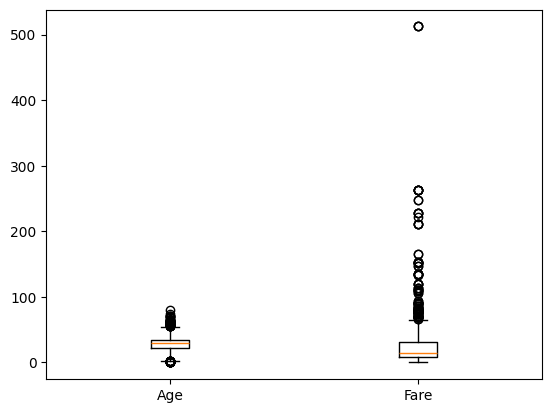

In [ ]:
# Age, Fare 값 BoxPlot으로 확인
plt.boxplot([df_train['Age'], df_train['Fare']])
plt.xticks([1, 2],['Age', 'Fare'])

두 Feature 모두 통계상의 이상치를 가지고 있으나, ‘Age‘의 경우 인간의 수명 범위내 임을 알 수 있어서,  ‘Fare’ 데이터에 대해서만 더 자세히 살펴본다. ‘Fare’는  티켓운임을 감안하여 ‘Pclass’와 함께 살펴본다.


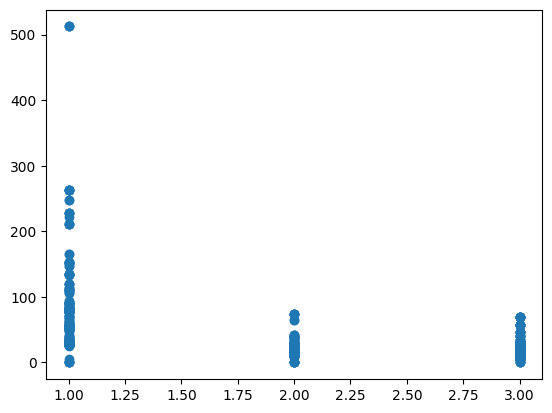

In [ ]:
# Fare 데이터 자세히 들여다보기 - Pclass별로
plt.scatter(df_train['Pclass'], df_train['Fare'])

In [ ]:
# Fare 데이터 자세히 들여다보기 - 실제 샘플 확인
df_train.sort_values(by=['Fare'], ascending=False).head(5)

PassengerId  Survived  Pclass                                Name  \
679          680         1       1  Cardeza, Mr. Thomas Drake Martinez   
258          259         1       1                    Ward, Miss. Anna   
737          738         1       1              Lesurer, Mr. Gustave J   
88            89         1       1          Fortune, Miss. Mabel Helen   
438          439         0       1                   Fortune, Mr. Mark   

        Sex   Age  SibSp  Parch    Ticket      Fare Embarked  Age_isna  
679    male  36.0      0      1  PC 17755  512.3292        C         0  
258  female  35.0      0      0  PC 17755  512.3292        C         0  
737    male  35.0      0      0  PC 17755  512.3292        C         0  
88   female  23.0      3      2     19950  263.0000        S         0  
438    male  64.0      1      4     19950  263.0000        S         0

실제 티켓의 운임으로 보인다. 본 실습에 주어진 데이터에는 이상치가 없다고 판단, 다음 단계로 넘어간다.

### 정규화

연속형 실수 값을 가지는 ‘Age‘, ‘Fare’'에 대해서만 정규화를 적용해본다. 정규화의 경우, 학습 데이터 기준으로 생성한 Scaler를 테스트 데이터에 그대로 적용해야 하는 것에 주의해야 한다.

In [ ]:
# Age, Fare에 대해 z-score 정규화
columns_to_scale = ['Age', 'Fare']
scaler_train = preprocessing.StandardScaler()
# 나중에 테스트 데이터에 적용하기 위하여 fit 단계와 transform 단계를 분리한다.
scaler_train = scaler_train.fit(df_train[columns_to_scale])
df_train[columns_to_scale] = scaler_train.transform(df_train[columns_to_scale])
df_train

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex       Age  \
0                              Braund, Mr. Owen Harris    male -0.592494   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  0.638776   
2                               Heikkinen, Miss. Laina  female -0.284677   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  0.407912   
4                             Allen, Mr. William Henry    male  0.407912   
..                                                 ...     ...       ...   
886                              Montvila, Rev. Juozas    male -0.207722   
887                       Graham, Miss. Margaret Edith  female -0.823357   
888           Johnston, Miss. Catherine Helen "Carrie"  female  0.000054   
889                              Behr, Mr. Karl Howell    male -0.284677   
890                                Dooley, Mr. Patrick    male  0.177049   

     SibSp  Parch            Ticket      Fare Embarked  Age_isna  
0        1      0         A/5 21171 -0.502445        S         0  
1        1      0          PC 17599  0.786845        C         0  
2        0      0  STON/O2. 3101282 -0.488854        S         0  
3        1      0            113803  0.420730        S         0  
4        0      0            373450 -0.486337        S         0  
..     ...    ...               ...       ...      ...       ...  
886      0      0            211536 -0.386671        S         0  
887      0      0            112053 -0.044381        S         0  
888      1      2        W./C. 6607 -0.176263        S         1  
889      0      0            111369 -0.044381        C         0  
890      0      0            370376 -0.492378        Q         0  

[891 rows x 12 columns]

### 인코딩

String 형태의 명목형 변수는 많은 ML 알고리즘에서 적절하게 계산되지 않는다. 명목형 변수인 ‘Sex’와 ‘Embarked’에 대해 One-Hot 인코딩을 하여 수치형 벡터로 변환한다.


In [ ]:
# Sex(성별), Embarked(배에 탑승한 위치) 데이터 인코딩
df_train = pd.get_dummies(df_train, columns = ['Sex', 'Embarked'])
df_train.iloc[:, -5:]

Sex_female  Sex_male  Embarked_C  Embarked_Q  Embarked_S
0         False      True       False       False        True
1          True     False        True       False       False
2          True     False       False       False        True
3          True     False       False       False        True
4         False      True       False       False        True
..          ...       ...         ...         ...         ...
886       False      True       False       False        True
887        True     False       False       False        True
888        True     False       False       False        True
889       False      True        True       False       False
890       False      True       False        True       False

[891 rows x 5 columns]

마지막으로 Cardinality가 높은 ‘Name’, ‘Ticket’에 대해 Feature로 활용할 수 있을지 살펴보자.

In [ ]:
# Ticket 데이터 살펴보기
df_train['Ticket'].sort_values().values[-10:]

array(['W./C. 6607', 'W./C. 6608', 'W./C. 6608', 'W./C. 6608',
       'W./C. 6608', 'W./C. 6609', 'W.E.P. 5734', 'W/C 14208',
       'WE/P 5735', 'WE/P 5735'], dtype=object)

In [ ]:
# Name 데이터 살펴보기
df_train['Name'].sort_values().values[:10]

array(['Abbing, Mr. Anthony', 'Abbott, Mr. Rossmore Edward',
       'Abbott, Mrs. Stanton (Rosa Hunt)', 'Abelson, Mr. Samuel',
       'Abelson, Mrs. Samuel (Hannah Wizosky)',
       'Adahl, Mr. Mauritz Nils Martin', 'Adams, Mr. John',
       'Ahlin, Mrs. Johan (Johanna Persdotter Larsson)',
       'Aks, Mrs. Sam (Leah Rosen)', 'Albimona, Mr. Nassef Cassem'],
      dtype=object)

‘Ticket’ 데이터는 Cardinality가 너무 높고, 분석에 의미 있게 사용될 것 같지 않아 대상에서 제외하도록 한다. Name의 경우도 분석 대상에서 제외하는 것을 고려해볼 수 있으나, 데이터를 최대한 활용하는 차원에서 Name에 포함된 호칭 (OOO.) 부분을 추출해서 활용도를 확인해보자.

In [ ]:
# Name에 포함된 호칭 추출하여 확인
# 정규표현식은 학습범위를 벗어나므로 결과만을 참고한다.
df_train['Name'].str.extract("([A-Za-z]+)\.").value_counts(dropna=False)

0       
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Capt          1
Lady          1
Countess      1
Don           1
Jonkheer      1
Mme           1
Ms            1
Sir           1
Name: count, dtype: int64

‘Mr’, “Miss’ ‘Mrs’ 등의 호칭은 ‘Sex(성별)’ 필드에서도 충분히 얻을 수 있는 정보이므로 직업/사회적 지위를 나타내는
호칭을 포함하는 경우 ‘Name_has_title’이라는 이름으로 Flag를 생성해보자

In [ ]:
# 이름에 'Master', 'Dr', 'Rev(목사)', 'Major', 'Col(대령)', 'Capt', 'Jonkheer(귀족)', 'Don', 'Countess(백작)', 'Sir＇ 포함 여부를 Flag화 한다.
df_train['Name_has_title'] = df_train['Name'].str.contains('Master|Dr|Rev|Major|Col|Capt|Jonkheer|Don|Countess|Sir').astype(int)

In [ ]:
# Name, Ticket 필드 분석에서 제외
df_train = df_train.drop(columns=['Ticket', 'Name'])

## 텍스트 분석

분석 대상이 비정형/반정형 텍스트 데이터의 경우
- 데이터 스토어에서 필요한 텍스트 데이터를 추출
- 어휘/구문 분석, 감성 분석, 토픽 분석, 오피니언 분석, 소셜 네트워크 분석 등을 실시
- 텍스트 분석 결과는 모델링 태스크와 연동하여 프로젝트 목적에 부합하는 최종 모델을 구축한다.


본 프로젝트에서는  전처리 단계에서 Name 필드로부터 의미 있는 Feature를 추출한 정도 이외에는) 텍스트 마이닝이 필요할 정도의 비정형 데이터를 포함하지 않아 텍스트 분석 단계를 거치지 않음


## 탐색적 분석

탐색적 분석 단계 빅데이터 분석 방법론
- 다양한 관점으로 평균, 분산 등 기초 통계량을 산출하여 데이터의 분포와 변수 간의 관계 등 데이터 자체의 특성과 통계적 특성을 파악한다.
- 시각화를 탐색적 데이터 분석을 위한 도구로 활용하여 데이터의 가독성을 높임


### 산포도 분석

개별 Feature에 대한 데이터 탐색은 전처리 과정에서 충분히 살펴보았으므로 여기에서는 관심대상인 ‘Survived’ 값과의 관계를 탐색해본다.

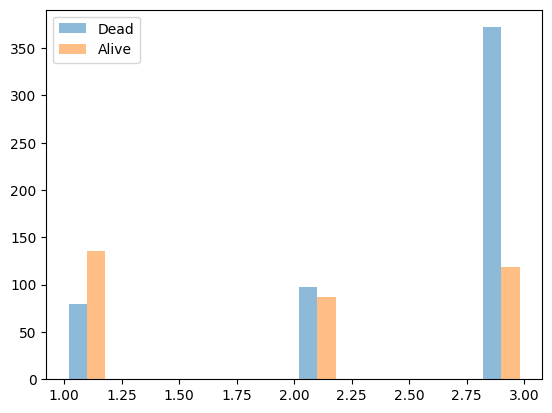

In [ ]:
# Pclass에 따른 Survived(사망자/생존자) 분포
hist1 = df_train[df_train['Survived']==0]['Pclass']
hist2 = df_train[df_train['Survived']==1]['Pclass']
plt.hist([hist1, hist2], label=['Dead', 'Alive'], alpha=0.5)
plt.legend(loc=0)

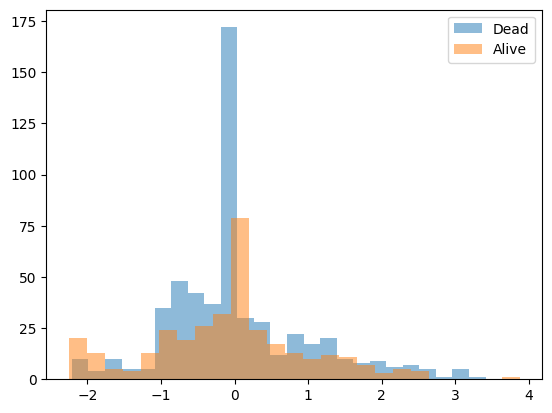

In [ ]:
# Pclass에 따른 Survived(사망자/생존자) 분포
hist1 = df_train[df_train['Survived']==0]['Age']
hist2 = df_train[df_train['Survived']==1]['Age']
plt.hist(hist1, label='Dead', bins=25, alpha=0.5)
plt.hist(hist2, label='Alive', bins=25, alpha=0.5)
plt.legend(loc=0)

### 상관관계 분석

In [ ]:
# 상관관계 계산
cols_to_corr = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Name_has_title']
df_train[cols_to_corr].corr().round(2)

Pclass   Age  SibSp  Parch  Fare  Name_has_title
Pclass            1.00 -0.33   0.08   0.02 -0.55           -0.05
Age              -0.33  1.00  -0.23  -0.18  0.09           -0.17
SibSp             0.08 -0.23   1.00   0.41  0.16            0.23
Parch             0.02 -0.18   0.41   1.00  0.22            0.17
Fare             -0.55  0.09   0.16   0.22  1.00            0.04
Name_has_title   -0.05 -0.17   0.23   0.17  0.04            1.00

([<matplotlib.axis.YTick at 0x78d96d1ec750>,
 [Text(0, 0.5, 'Pclass'),
  Text(0, 1.5, 'Age'),
  Text(0, 2.5, 'SibSp'),
  Text(0, 3.5, 'Parch'),
  Text(0, 4.5, 'Fare'),
  Text(0, 5.5, 'Name_has_title')])

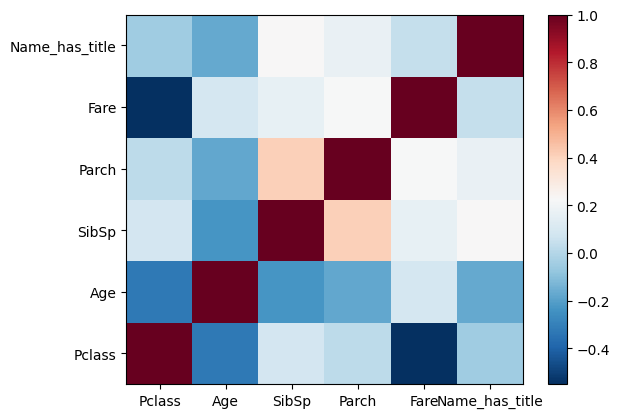

In [ ]:
# 상관관계 시각화
cols_to_corr = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Name_has_title']
fig, ax = plt.subplots(1, 1)
c = ax.pcolor(df_train[cols_to_corr].corr().round(2), cmap='RdBu_r')
fig.colorbar(c, ax=ax)
plt.xticks(np.arange(0.5, len(cols_to_corr), 1), cols_to_corr)
plt.yticks(np.arange(0.5, len(cols_to_corr), 1), cols_to_corr)

상관관계가 높은 변수의 경우 모델링 단계에 있어서 차원축소 등에 사용 가능
본 데이터는 ‘Fare’와 ‘Pclass’가 약한 음의 상관관계 -0.55, ‘SibSp’와 ‘Parch’가 약한 양의 상관관계 0.41 만이 있다.

## 모델링

모델링 단계 빅데이터 분석 방법론
- 모델의 과적합 방지와 일반화를 위해서 분석용 데이터셋을 훈련용 데이터와 모델의 검증 테스트하기 위한 데이터로 분할
- (가설 설정을 통하여 통계 모델을 만들거나) 기계 학습을 이용한 데이터의 분류, - 예측, 군집 등의 모델을 생성
- 필요 시 비정형 데이터 분석결과를 활용하여 통합 모델링 수행


### 전처리 함수 refactoring

- 훈련용 데이터에 적용한 전처리 방법들을, 테스트 데이터에도 적용해야 한다는 개념을 학습하기 위해 임의로 함수를 작성함
- scikit-learn의 pipeline이나 PyTorch와 같은 전용 프레임워크를 사용 할 수 있음

In [ ]:
# 전처리 함수 refactoring
def part5_preprocessing(df_orig, mode='train', replace_embarked=None, replace_age=None, scaler=None):
    df = df_orig.copy()
    # 결측치 처리 (훈련 데이터 상에서 파악한 최빈도값/평균값 공통 사용)
    if mode == 'train':
        replace_embarked = df_train['Embarked'].value_counts(dropna=False).idxmax()
        replace_age = df_train['Age'].mean().round(2)
    df['Embarked'] = df['Embarked'].fillna(replace_embarked)
    df['Age_isna'] = df['Age'].isna().astype(int)
    df['Age'] = df['Age'].fillna(replace_age)

    # 이상값 처리 - 없음

    # 데이터 정규화 (훈련 데이터 상에서 학습된 scaler 공통 사용)
    if mode == 'train':
        scaler = preprocessing.StandardScaler()
        scaler = scaler.fit(df[['Age', 'Fare']])
    df[['Age', 'Fare']] = scaler.transform(df[['Age','Fare']])

    # 데이터 인코딩
    df = pd.get_dummies(df, columns = ['Sex', 'Embarked'])
    df['Name_has_title'] = df['Name'].str.contains('Master|Dr|Rev|Major|Col|Capt|Jonkheer|Don|Countess|Sir').astype(int)

    # 전처리에 사용된 원본 필드, 분석에 불필요한 필드를 제외시킨다.
    df = df.drop(columns=['Name', 'Ticket','Cabin'])

    return df, replace_embarked, replace_age, scaler

### 훈련용 데이터 전처리 (일괄)

공통 함수화 한 커스텀 전처리 함수를 통해 학습 데이터와 테스트 데이터에 동일한 기준으로 전처리를 수행한다.

In [ ]:
# 학습 데이터 전처리 (일괄 적용)
df_train = pd.read_csv(colab_path + 'titanic/titanic_train.csv')
df_train, replace_embarked, replace_age, scaler = part5_preprocessing(df_train, 'train')

### 훈련/테스트 데이터 분할

- 모델 학습 이전에 모델 검증을 위한 테스트 데이터를 별도 분리하고 최종 검증에 사용
- 본 실습에서는 사전에 이미 분리하여 본 과정은 생략함.


### Feature (X), Label (y) 분리

- 지도학습의 경우 학습용 데이터가 Label을 포함하고 있어야 한다.
- Label이 어떤 필드인지를 지정해주기 위해 데이터에서 Feature와 Label을 분리


In [ ]:
# Feature(X), Label(y) 분리
target_col = 'Survived'
train_y = df_train[target_col]
train_X = df_train.drop(columns=[target_col])
train_X = train_X.set_index('PassengerId')

### 훈련/평가용 데이터 분할

모델을 평가하기 위한 평가용 데이터셋을 분할한다.

In [ ]:
from sklearn.model_selection import train_test_split

# 훈련용/평가용 데이터 분할
train_X, val_X, train_y, val_y = train_test_split(train_X, train_y, test_size=0.3, random_state=42 )
train_X

Pclass       Age  SibSp  Parch      Fare  Age_isna  Sex_female  \
PassengerId                                                                   
113               3 -0.592494      0      0 -0.486337         0       False   
473               2  0.254004      1      2 -0.089684         0        True   
454               1  1.485273      1      0  1.145664         0       False   
446               1 -1.977672      0      2  0.999770         0       False   
21                2  0.407912      0      0 -0.124920         0       False   
...             ...       ...    ...    ...       ...       ...         ...   
696               2  1.716136      0      0 -0.376603         0       False   
549               3  0.254004      1      1 -0.235157         0       False   
18                2  0.000054      0      0 -0.386671         1       False   
847               3  0.000054      8      2  0.751946         1       False   
880               1  2.023954      0      1  1.025945         0        True   

             Sex_male  Embarked_C  Embarked_Q  Embarked_S  Name_has_title  
PassengerId                                                                
113              True       False       False        True               0  
473             False       False       False        True               0  
454              True        True       False       False               0  
446              True       False       False        True               1  
21               True       False       False        True               0  
...               ...         ...         ...         ...             ...  
696              True       False       False        True               0  
549              True       False       False        True               0  
18               True       False       False        True               0  
847              True       False       False        True               0  
880             False        True       False       False               0  

[436 rows x 12 columns]

지도학습-분류를 위한 모델을 3개 선택하여 학습시키고 가장 좋은 성능을 보이는 모델을 최종 선택한다. 3가지 모델은 Logistic Regression, SVM, Decision Tree로 한다.


### 모델 #1 – Logistic Regression

로지스틱 회귀는 로지스틱 함수를 통해 데이터가 어떤 범주에 속할 확률을 0에서 1 사이 값으로 예측하고, 그 확률에 따라 가능성이 더 높은 범주에 속하는 것으로 분류하는 지도학습 모델
Scikit-learn에서 제공하는 LogisticRegression 모듈을 사용할 경우 주요 파라미터는 다음과 같다.
학습시 설정 할 주요 파라미터는 penalty(규제) 종류와 그 강도(C) 임


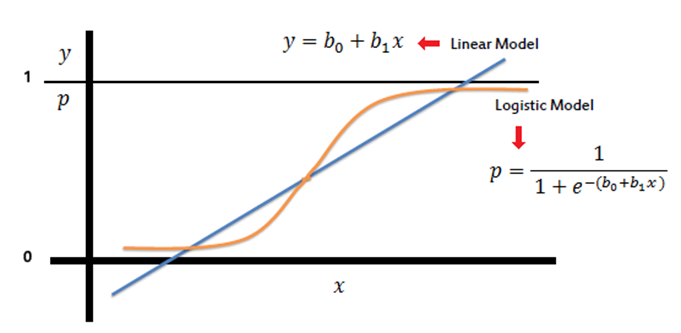

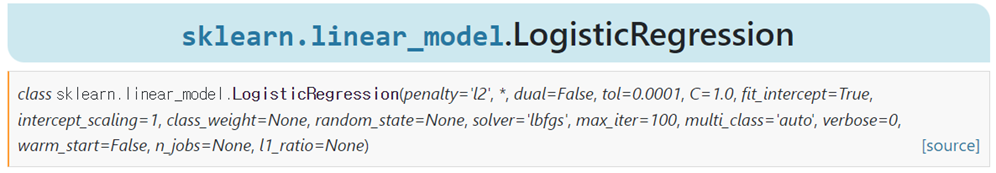

In [ ]:
# 모델 학습 및 예측
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression(C=20, max_iter=1000, random_state=42)
model1.fit(train_X, train_y)

LogisticRegression(C=20, max_iter=1000, random_state=42)

### 모델 #2 – SVM 선택

SVM(Support Vector Machine, 서포트 벡터 머신)은 결정 경계(Decision Boundary), 즉 분류를 위한 기준 선(평면)을 정의하고자 할 때 그 중 가장 큰 폭을 가지는 경계를 찾는 알고리즘
Scikit-learn에서 제공하는 SVC 모듈을 사용할 경우 주요 파라미터 중 학습 시 결정이 필요한 파라미터는 kernel 등이 있다.

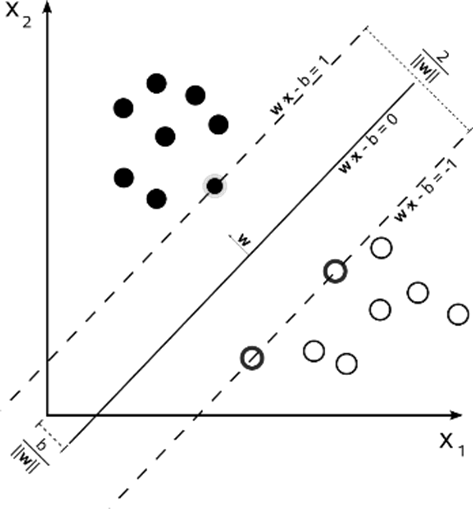

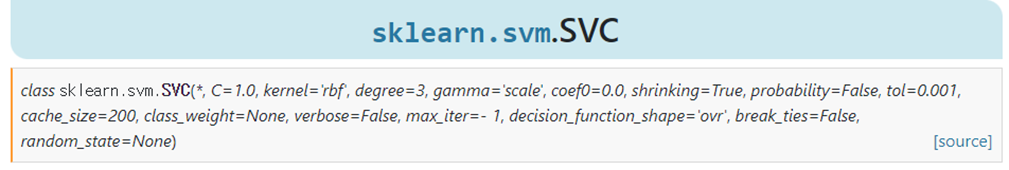

In [ ]:
# 모델 학습 및 예측
from sklearn.svm import SVC
model2 = SVC(kernel = 'linear', probability=True, random_state=42)
model2.fit(train_X, train_y)

SVC(kernel='linear', probability=True, random_state=42)

### 모델 #3 – Random Forest 선택

- Random Forest는 의사결정나무의 앙상블 버전 알고리즘
- sklearn.ensemble.RandomForestClassifier를 통해 구현할 수 있으며, Random Forest 알고리즘의 주의사항인 과적합을 제어하기 위해 max_depth, min_samples_split 파라미터 최적화 필요


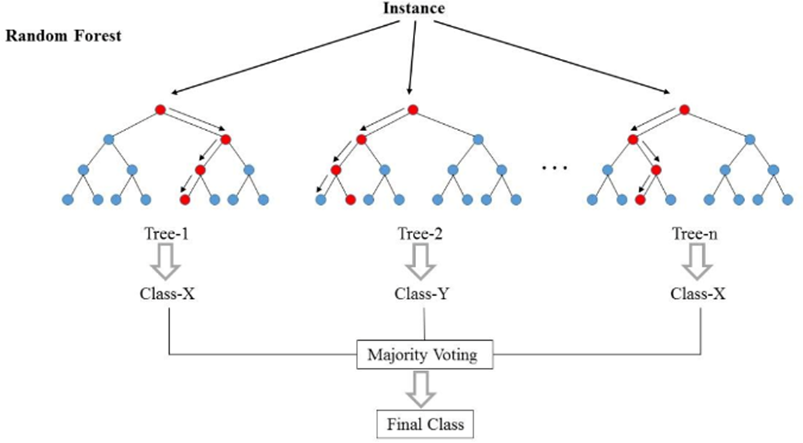

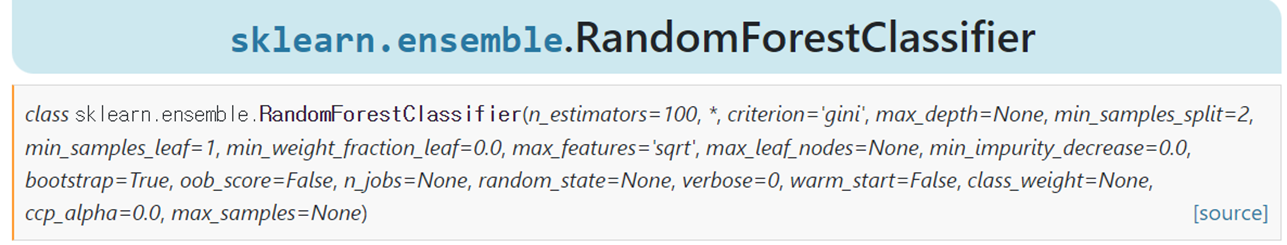

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html


In [ ]:
# 모델 학습
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier(max_depth = 3, random_state=42)
model3.fit(train_X, train_y)

RandomForestClassifier(max_depth=3, random_state=42)

## 모델 평가 및 검증

모델 평가 및 검증 단계 빅데이터 분석 방법론
- 프로젝트 정의서의 평가 기준에 따라 모델의 완성도를 평가
- 데이터 분석 목적 및 데이터셋 특성에 따라 모델 평가 방법은 다양
- 모델 훈련 및 평가에 활용된 데이터가 아닌 별도의 데이터 (운영용 데이터) 를 확보하여 모델의 객관성과 실무 적용성을 검증
- 요구되는 성능 목표에 미달하는 경우 모델 튜닝 작업을 수행


### 모델 #1 – Logistic Regression 평가 (Validation 데이터 기준)

In [ ]:
# 모델 평가
print(model1.score(train_X, train_y))  # accuracy
print(model1.score(val_X, val_y))

0.8188073394495413
0.7807486631016043


### 모델 #2 – SVM (Validation 데이터 기준)

In [ ]:
# 모델 평가
print(model2.score(train_X, train_y))  # accuracy
print(model2.score(val_X, val_y))

0.8027522935779816
0.7967914438502673


### 모델 #3 – Random Forest (Validation 데이터 기준)

In [ ]:
# 모델 평가
print(model3.score(train_X, train_y))  # accuracy
print(model3.score(val_X, val_y))

0.8256880733944955
0.7807486631016043


### 3가지 모델 성능 비교 (AUC Score)

In [ ]:
# AUC Score
from sklearn.metrics import roc_auc_score
print('AUC value (Logistic Regression): {}'.format(roc_auc_score(val_y, model1.predict(val_X))))
print('AUC value (SVM): {}'.format(roc_auc_score(val_y, model2.predict(val_X))))
print('AUC value (RandomForest): {}'.format(roc_auc_score(val_y, model3.predict(val_X))))

AUC value (Logistic Regression): 0.7750322580645161
AUC value (SVM): 0.7870322580645162
AUC value (RandomForest): 0.7587741935483873


### 3가지 모델 성능 비교 (ROC Curve Plotting)

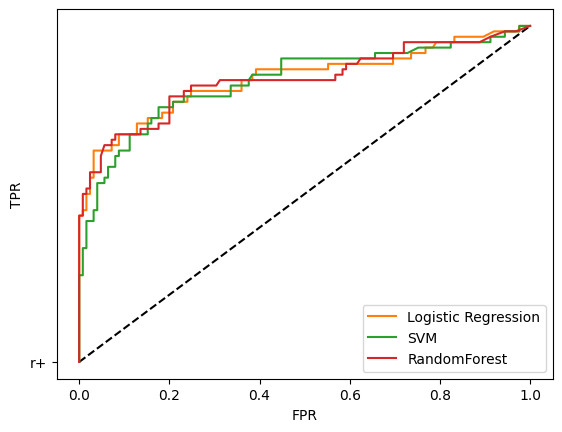

In [ ]:
# ROC Curve 플롯팅
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(val_y, model1.predict_proba(val_X)[:,1])
plt.plot([0,1], [0,1], "k--", "r+") #0.5 기준선
plt.plot(fpr, tpr, label='Logistic Regression')
fpr2, tpr2, thresholds2 = roc_curve(val_y, model2.predict_proba(val_X)[:,1])
plt.plot(fpr2, tpr2, label='SVM')
fpr3, tpr3, thresholds3 = roc_curve(val_y, model3.predict_proba(val_X)[:,1])
plt.plot(fpr3, tpr3, label='RandomForest')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc=0)

## 모델 적용 및 운영방안 수립

모델 적용및 운영방안 수립 단계 빅데이터 분석 방법론
- 모델을 운영시스템에 적용하는데 필요한 모델에 대한 알고리즘 설명서 작성
- 모델의 안정적 운영을 모니터링하는 방안을 수립


### 모델 저장

- 실제 운영환경에서는 모델을 학습하는 시스템과 실시간 운영 시스템이 분리된 경우가 많다.
- 학습된 모델을 버전 관리하고 운영시스템에 업데이트 하는 관리가 필요
- pickle 형태로 저장하고 예측이 필요한 시점에 해당 모델을 로드해서 이용 예 설명

In [ ]:
import pickle
# 모델 저장
# AUC Score 기준 가장 성능이 좋았던 Logistic Regression 모델을 저장한다.
with open(colab_path + 'titanic/saved_model.pickle','wb') as fw:
    pickle.dump(model1, fw)

### 모델 로드

In [ ]:
# 모델 로드
with open(colab_path + 'titanic/saved_model.pickle','rb') as f:
    model = pickle.load(f)

### 테스트용 데이터 전처리

In [ ]:
# 테스트 데이터 전처리
df_test = pd.read_csv(colab_path + '/titanic/titanic_test.csv')
df_test, replace_embarked, replace_age, scaler = part5_preprocessing(df_test, 'test', replace_embarked, replace_age, scaler)
df_test

PassengerId  Pclass       Age  SibSp  Parch      Fare  Age_isna  \
0            892       3  0.369435      0      0 -0.490783         0   
1            893       3  1.331365      1      0 -0.507479         0   
2            894       2  2.485680      0      0 -0.453367         0   
3            895       3 -0.207722      0      0 -0.474005         0   
4            896       3 -0.592494      1      1 -0.401017         0   
..           ...     ...       ...    ...    ...       ...       ...   
413         1305       3  0.000054      0      0 -0.486337         1   
414         1306       1  0.715730      0      0  1.544246         0   
415         1307       3  0.677253      0      0 -0.502445         0   
416         1308       3  0.000054      0      0 -0.486337         1   
417         1309       3  0.000054      1      1 -0.198244         1   

     Sex_female  Sex_male  Embarked_C  Embarked_Q  Embarked_S  Name_has_title  
0         False      True       False        True       False               0  
1          True     False       False       False        True               0  
2         False      True       False        True       False               0  
3         False      True       False       False        True               0  
4          True     False       False       False        True               0  
..          ...       ...         ...         ...         ...             ...  
413       False      True       False       False        True               0  
414        True     False        True       False       False               1  
415       False      True       False       False        True               0  
416       False      True       False       False        True               0  
417       False      True        True       False       False               1  

[418 rows x 13 columns]

In [ ]:
# 결측치 처리
# 테스트 데이터 중 1건에 'Fare'에 대한 결측치가 존재하므로 결측치를 train 데이터의 평균값으로 대체한다.
replace_fare = df_train['Fare'].mean().round(2)
df_test['Fare'] = df_test['Fare'].fillna(replace_fare)
test_X = df_test.set_index('PassengerId')

### 생존률 예측 (테스트용 데이터)

In [ ]:
# 최종 생존율 예측
pred_y = model.predict(test_X)
df_result = pd.DataFrame({'PassengerId':df_test['PassengerId'], 'Survived': pred_y})
df_result

PassengerId  Survived
0            892         0
1            893         1
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]